Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [38]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train",
   image_size=(img_height, img_width),  # specify your image dimensions
    batch_size=batch_size,                    # specify your batch size
    validation_split=0.2,                     # 20% for validation
    subset='both',                            # load both training and validation subsets
    seed=123 
)


Found 12239 files belonging to 9 classes.
Using 9792 files for training.
Using 2447 files for validation.


In [39]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#val_ds = ##todo
# Unpack the dataset
train_ds = dataset[0]
val_ds = dataset[1]

In [34]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


AttributeError: '_PrefetchDataset' object has no attribute 'shape'

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
main_directory = pathlib.Path("C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
# Define the main directory containing subdirectories
#main_directory = 'path/to/your/main_directory'

# List to hold the image paths from each directory
image_paths = []

# Traverse each directory in the main directory
for subdir, _, files in os.walk(main_directory):
    # Filter for image files (e.g., .png, .jpg)
    image_files = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        # Get the first image file
        image_path = os.path.join(subdir, image_files[0])
        image_paths.append((subdir, image_path))

# Now plot the images from each directory
for subdir, image_path in image_paths:
    img = mpimg.imread(image_path)
    plt.figure()
    plt.imshow(img)
    plt.title(f'Image from {subdir}')
    plt.axis('off')  # Hide axes
    plt.show()  # Or plt.savefig('output.png') to save the plot

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
### Your code goes here
# Define the rescaling layer
rescaling_layer = tf.keras.layers.Rescaling(1./255)

# Example: Create a simple model with the rescaling layer
model = tf.keras.Sequential([
     tf.keras.layers.Rescaling((1./255),input_shape=(img_height, img_width, 3)),
     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

C:\Users\pratibha\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [11]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 638ms/step - accuracy: 0.2205 - loss: 2.2629 - val_accuracy: 0.2975 - val_loss: 1.8759
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 604ms/step - accuracy: 0.3428 - loss: 1.8043 - val_accuracy: 0.4407 - val_loss: 1.6124
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 606ms/step - accuracy: 0.4620 - loss: 1.5449 - val_accuracy: 0.5235 - val_loss: 1.4351
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 606ms/step - accuracy: 0.4904 - loss: 1.4500 - val_accuracy: 0.4609 - val_loss: 1.5635
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 614ms/step - accuracy: 0.4894 - loss: 1.3956 - val_accuracy: 0.5324 - val_loss: 1.4167
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 604ms/step - accuracy: 0.5352 - loss: 1.3246 - val_accuracy: 0.5145 - val_loss: 1.4148
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 617ms/step - accuracy: 0.5718 - loss: 1.2158 - val_accuracy: 0.4832 - val_loss: 1.5000
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 606ms/step - accuracy: 0.5692 - loss: 1.1603 - val_accu

### Visualizing training results

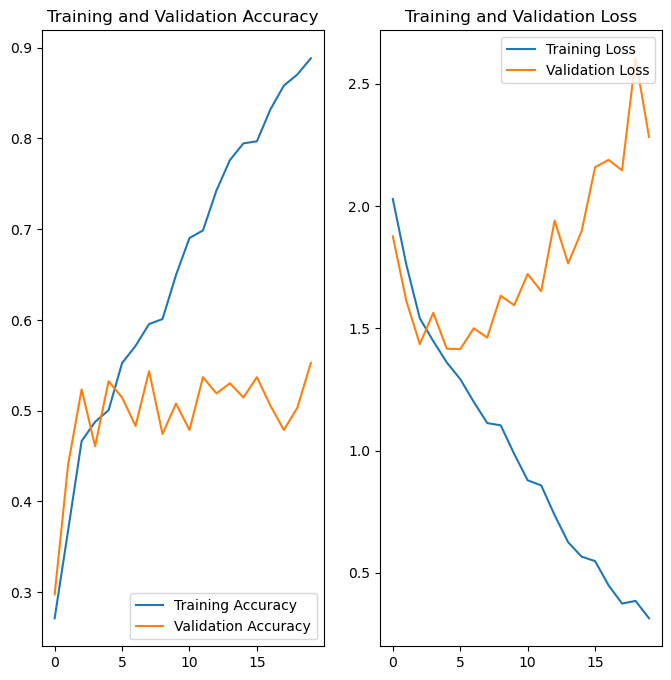

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Training accuracy is very good but  validation accuracy is poor . This is a clear sign of overfitting . Hence we will use some drop out layers to reduce over fitting 

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [15]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = tf.keras.Sequential([
     tf.keras.layers.Rescaling((1./255),input_shape=(img_height, img_width, 3)),
     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),  # Dropout layer added
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),  # Dropout layer added
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),  # Dropout layer added
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),  # Dropout layer added
    tf.keras.layers.Dense(9, activation='softmax')
])



### Compiling the model

In [16]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [17]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 689ms/step - accuracy: 0.1790 - loss: 2.6341 - val_accuracy: 0.1924 - val_loss: 2.0598
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 674ms/step - accuracy: 0.2317 - loss: 2.0409 - val_accuracy: 0.1924 - val_loss: 2.0611
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 669ms/step - accuracy: 0.1965 - loss: 2.0350 - val_accuracy: 0.1924 - val_loss: 2.0282
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 672ms/step - accuracy: 0.2153 - loss: 1.9973 - val_accuracy: 0.3781 - val_loss: 1.8702
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 681ms/step - accuracy: 0.3699 - loss: 1.7974 - val_accuracy: 0.4049 - val_loss: 1.6795
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 691ms/step - accuracy: 0.4197 - loss: 1.6163 - val_accuracy: 0.4049 - val_loss: 1.6603
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 693ms/step - accuracy: 0.4383 - loss: 1.5614 - val_accuracy: 0.4273 - val_loss: 1.5860
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 770ms/step - accuracy: 0.4565 - loss: 1.5699 - val_accu

### Visualizing the results

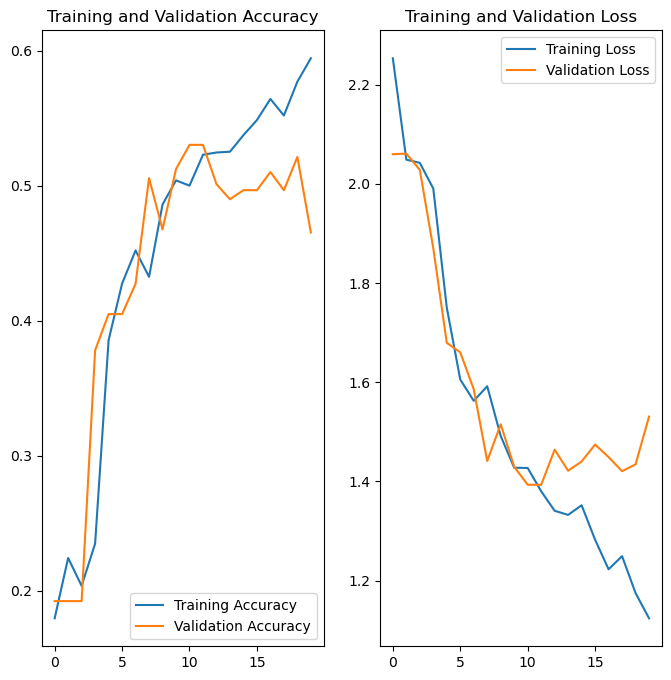

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Training accuracy and validation accuracy are close to each other , hence over fitting is reduced.But the overall accuracy is low now . Hence we will try to augment the data set .

In [22]:
# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2),
])
# Apply data augmentation
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [24]:
model = tf.keras.Sequential([
     tf.keras.layers.Rescaling((1./255),input_shape=(img_height, img_width, 3)),
     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),  # Dropout layer added
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),  # Dropout layer added
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),  # Dropout layer added
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),  # Dropout layer added
    tf.keras.layers.Dense(9, activation='softmax')
])


In [21]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 758ms/step - accuracy: 0.1997 - loss: 2.8502 - val_accuracy: 0.2864 - val_loss: 2.0241
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 753ms/step - accuracy: 0.2508 - loss: 1.9507 - val_accuracy: 0.3221 - val_loss: 1.9409
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 744ms/step - accuracy: 0.3228 - loss: 1.8193 - val_accuracy: 0.4251 - val_loss: 1.6992
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 751ms/step - accuracy: 0.3657 - loss: 1.7625 - val_accuracy: 0.4362 - val_loss: 1.6596
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 756ms/step - accuracy: 0.4019 - loss: 1.6750 - val_accuracy: 0.4362 - val_loss: 1.6486
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 753ms/step - accuracy: 0.4168 - loss: 1.6584 - val_accuracy: 0.4787 - val_loss: 1.4936
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 751ms/step - accuracy: 0.4266 - loss: 1.5989 - val_accuracy: 0.4497 - val_loss: 1.5477
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 757ms/step - accuracy: 0.4346 - loss: 1.6117 - val_accu

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
import numpy as np

# Initialize a counter for class distribution
class_count = np.zeros(9)

# Iterate over the dataset
for images, labels in train_ds:
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    class_count[unique] += counts

# Print the class distribution
for i, count in enumerate(class_count):
    print(f"Class {i}: {int(count)}")

Class 0: 92
Class 1: 309
Class 2: 77
Class 3: 352
Class 4: 277
Class 5: 370
Class 6: 58
Class 7: 142
Class 8: 115


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [40]:
#!pip install Augmentor
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [41]:
print(class_names)
path_to_training_dataset="C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
#path_to_training_dataset = "C:\Users\pratibha\Desktop\PRATIBHA\MTECH_NOTES\ANN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
import Augmentor
import os
for i in class_names:
    print(f"Processing class directory: {path_to_training_dataset+i}")  # Print the path
    p = Augmentor.Pipeline(path_to_training_dataset + i)   
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Processing class directory: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x270B1A5D090>: 100%|██████████| 500/500 [00:02<00:00, 201.07 Samples/s]                  


Processing class directory: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x270B1A5C190>: 100%|██████████| 500/500 [00:02<00:00, 189.67 Samples/s]                  


Processing class directory: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x270AFC0DB90>: 100%|██████████| 500/500 [00:02<00:00, 191.04 Samples/s]                  


Processing class directory: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x270105F9690>: 100%|██████████| 500/500 [00:14<00:00, 35.00 Samples/s]                    


Processing class directory: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus
Initialised with 357 image(s) found.
Output directory set to C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x270B1A5F490>: 100%|██████████| 500/500 [00:11<00:00, 42.49 Samples/s]                    


Processing class directory: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign
Initialised with 462 image(s) found.
Output directory set to C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x270AFC0FFD0>: 100%|██████████| 500/500 [00:02<00:00, 179.83 Samples/s]                  


Processing class directory: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x270AEE05D90>: 100%|██████████| 500/500 [00:06<00:00, 76.64 Samples/s]


Processing class directory: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x270B468FE90>: 100%|██████████| 500/500 [00:02<00:00, 180.92 Samples/s]


Processing class directory: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x270AA9CFC50>: 100%|██████████| 500/500 [00:02<00:00, 174.33 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

14500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\pratibha\\Desktop\\PRATIBHA\\MTECH_NOTES\\ANN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1496df3b-c2fd-4ee5-8026-9a747d54323d.jpg',
 'C:\\Users\\pratibha\\Desktop\\PRATIBHA\\MTECH_NOTES\\ANN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_23440409-f38b-4623-bb7b-e3a924028c0e.jpg',
 'C:\\Users\\pratibha\\Desktop\\PRATIBHA\\MTECH_NOTES\\ANN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_25e74865-1415-4874-a42f-96c8fc8a5848.jpg',
 'C:\\Users\\pratibha\\Desktop\\PRATIBHA\\MTECH_NOTES\\ANN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_26c

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

NameError: name 'original_df' is not defined

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [45]:
batch_size = 32
img_height = 180
img_width = 180
path_list

['C:\\Users\\pratibha\\Desktop\\PRATIBHA\\MTECH_NOTES\\ANN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1496df3b-c2fd-4ee5-8026-9a747d54323d.jpg',
 'C:\\Users\\pratibha\\Desktop\\PRATIBHA\\MTECH_NOTES\\ANN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_23440409-f38b-4623-bb7b-e3a924028c0e.jpg',
 'C:\\Users\\pratibha\\Desktop\\PRATIBHA\\MTECH_NOTES\\ANN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_25e74865-1415-4874-a42f-96c8fc8a5848.jpg',
 'C:\\Users\\pratibha\\Desktop\\PRATIBHA\\MTECH_NOTES\\ANN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_26c

In [46]:
# Define the base path
base_path = "C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# List all class directories
class_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

# Print out class directories
print("Class directories:", class_dirs)

# Check for output directories for each class
for class_dir in class_dirs:
    output_dir = os.path.join(base_path, class_dir, 'output')
    if os.path.exists(output_dir):
        print(f"Output directory for {class_dir}: {output_dir}")
    else:
        print(f"No output directory found for {class_dir}: {output_dir}")

Class directories: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Output directory for actinic keratosis: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output
Output directory for basal cell carcinoma: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output
Output directory for dermatofibroma: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output
Output directory for melanoma: C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output
Output directory for nevus: 

In [47]:
augmented_image_paths = []
for class_dir in class_dirs:
    output_dir = os.path.join(base_path, class_dir, 'output')
    if os.path.exists(output_dir):
        augmented_image_paths.extend(glob(os.path.join(output_dir, '*.jpg'))) 

In [143]:


#base_dir = "C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
#augmented_data_path = os.path.join(base_path, '*', 'output')
#for file in glob.glob("base_dir/output/*.jpg"): 
 ##  os.rename(file, new_file)

In [48]:
import os 
import glob
base_dir = "C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
#base_dir = "C:\Users\pratibha\Desktop\PRATIBHA\MTECH_NOTES\ANN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
# List all class directories
class_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Print out class directories
print("Class directories:", class_dirs)
for class_dir in class_dirs:
    new_dir = os.path.join(base_dir,class_dir)
    augmented_dir = os.path.join(new_dir, "output")
    print (augmented_dir)
    files_to_move = glob.glob(os.path.join(augmented_dir, '*'))
    print (files_to_move)
    for file_path in files_to_move:
        filename = os.path.basename(file_path)
        print (filename)
        destination = os.path.join(new_dir, filename)
        os.rename(file_path, destination)
        print(destination)

Class directories: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output
['C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1496df3b-c2fd-4ee5-8026-9a747d54323d.jpg', 'C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_23440409-f38b-4623-bb7b-e3a924028c0e.jpg', 'C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic kerat

#### **Todo:** Create a training dataset

In [49]:
data_dir_train = "C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
#base_dir = "C:/Users/pratibha/Desktop/PRATIBHA/MTECH_NOTES/ANN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" = augmented_data_path
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16739 files belonging to 9 classes.
Using 13392 files for training.


#### **Todo:** Create a validation dataset

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16739 files belonging to 9 classes.
Using 3347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [51]:
## your code goes here
model = tf.keras.Sequential([
     tf.keras.layers.Rescaling((1./255),input_shape=(img_height, img_width, 3)),
     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),  # Dropout layer added
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),  # Dropout layer added
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),  # Dropout layer added
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),  # Dropout layer added
    tf.keras.layers.Dense(9, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [53]:
#epochs = 30
## Your code goes here, use 50 epochs.
#history = # your model fit code
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 263s 619ms/step - accuracy: 0.1804 - loss: 2.3616 - val_accuracy: 0.3263 - val_loss: 1.8158
Epoch 2/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 246s 587ms/step - accuracy: 0.3790 - loss: 1.6679 - val_accuracy: 0.4045 - val_loss: 1.5929
Epoch 3/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 248s 591ms/step - accuracy: 0.4341 - loss: 1.5026 - val_accuracy: 0.5348 - val_loss: 1.3795
Epoch 4/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 245s 585ms/step - accuracy: 0.4955 - loss: 1.3929 - val_accuracy: 0.5811 - val_loss: 1.2313
Epoch 5/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 251s 599ms/step - accuracy: 0.5413 - loss: 1.2860 - val_accuracy: 0.5754 - val_loss: 1.1775
Epoch 6/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 245s 585ms/step - accuracy: 0.5579 - loss: 1.2185 - val_accuracy: 0.6418 - val_loss: 1.0901
Epoch 7/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 235s 561ms/step - accuracy: 0.5955 - loss: 1.1225 - val_accuracy: 0.6696 - val_loss: 1.0373
Epoch 8/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 232s 554ms/step - accuracy: 0.6109 -

#### **Todo:**  Visualize the model results

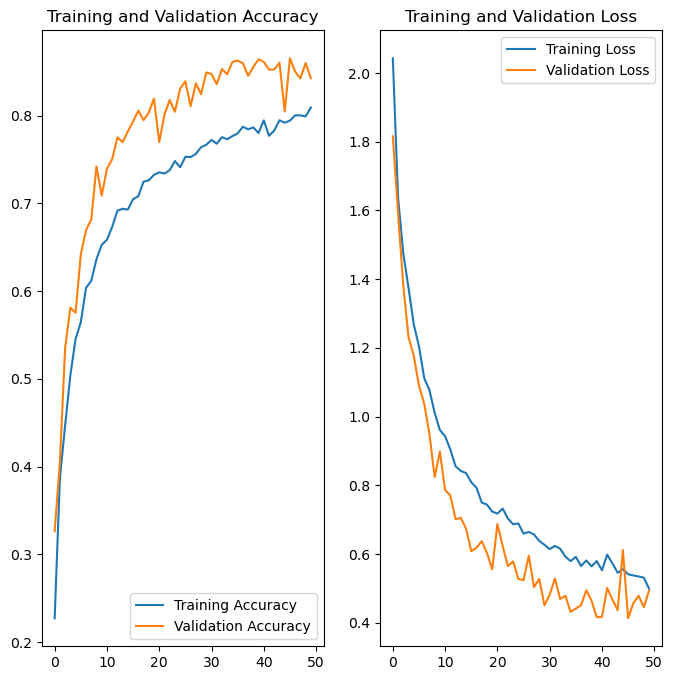

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



# Post data augmentation and drop out layers , the training accuracy achieved is satisfactory and training and validation accuracy are very closely matching .